In [10]:
# 神经网络的搭建--分类任务 #
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F   # 激励函数都在这
import numpy as np
# x0，x1是数据，y0,y1是标签
n_data = torch.ones(100, 2)         # 数据的基本形态
x0 = torch.normal(2*n_data, 1)      # 类型0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100,dtype=torch.int)               # 类型0 y data (tensor), shape=(100, )
x1 = torch.normal(-2*n_data, 1)     # 类型1 x data (tensor), shape=(100, 1)
y1 = torch.ones(100,dtype=torch.int)                # 类型1 y data (tensor), shape=(100,

In [11]:
# 注意 x, y 数据的数据形式是一定要像下面一样 (torch.cat 是在合并数据)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # LongTensor = 64-bit integer

In [12]:
print(y1)


tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1])


In [13]:
import csv
import numpy as np

N_data = np.ones((100, 2))

In [18]:
X0 = np.random.normal(2*n_data, 1)      # 类型0 x data (tensor), shape=(100, 2)
Y0 = np.zeros(100)               # 类型0 y data (tensor), shape=(100, )
X1 = np.random.normal(-2*n_data, 1)  # 类型1 x data (tensor), shape=(100, 1)
Y1 = np.ones(100)      
X = np.row_stack((X0,X1)) # FloatTensor = 32-bit floating

In [19]:
print(X)

[[ 0.22250731  0.88750229]
 [ 2.09762435  2.48471664]
 [ 1.28445093  2.36140761]
 [ 2.60492291  1.06559972]
 [ 1.3864416   1.17520045]
 [ 1.79312899  2.27875612]
 [ 2.0745596   1.67700369]
 [ 2.51841789  2.50172497]
 [ 2.02293716  1.57169936]
 [ 1.995462    1.11320556]
 [ 1.58944209  1.96116969]
 [ 2.09975982  3.64541444]
 [ 1.89778653  2.0051688 ]
 [ 3.03397358  2.06558447]
 [ 1.91730125  1.58153534]
 [ 1.56720986  2.27341651]
 [ 3.12132274  2.90278453]
 [ 3.09086073  0.74579235]
 [ 0.85383491  2.79793566]
 [ 2.15773604  1.10256777]
 [ 0.85384392  3.06917131]
 [ 2.86096689  2.71889143]
 [ 1.17625908  3.25891294]
 [ 1.204319    2.35158566]
 [ 3.97328663  1.97217412]
 [ 2.50708386  1.99533948]
 [ 0.56547078  0.24978338]
 [ 1.98854179  2.38834843]
 [ 1.99134681  0.96309615]
 [ 2.46519007  2.20500669]
 [ 2.80092221  1.11445647]
 [ 3.46651993  0.79528273]
 [ 1.84516816  2.05215684]
 [ 0.06468111  0.44609378]
 [-0.02943415  2.26420476]
 [ 1.24301143  3.41874697]
 [ 1.33784741  2.70155207]
 

In [20]:
with open("./data.csv", "a", newline="") as cf:
    w = csv.writer(cf)
    for i in range(200):
        w.writerow([X[i][0],X[i][1]])
    cf.close()

In [21]:
Y_ = np.append(y0,y1) # FloatTensor = 32-bit floating

In [22]:
print(Y_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [23]:
for i in range(200):
    print(Y_[i])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [24]:
with open("./label.csv", "a", newline="") as cf:
    w = csv.writer(cf)
    for i in range(200):
        num = []
        num.append(Y_[i])
        w.writerow(num)
    cf.close()

In [3]:
print(y)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])


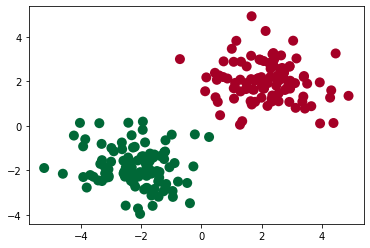

In [4]:
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [11]:
class Net(torch.nn.Module):     # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.out = torch.nn.Linear(n_hidden, n_output)       # 输出层线性输出

    def forward(self, x):
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.out(x)                 # 输出值, 但是这个不是预测值, 预测值还需要再另外计算
        return x

net = Net(n_feature=2, n_hidden=10, n_output=2) # 几个类别就几个 output

In [12]:
# 训练网络
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)  
# 算误差的时候, 注意真实值!不是! one-hot 形式的, 而是1D Tensor, (batch,)
# 但是预测值是2D tensor (batch, n_classes)
loss_func = torch.nn.CrossEntropyLoss()

plt.ion()   # 画图
plt.show()


/Users/licong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


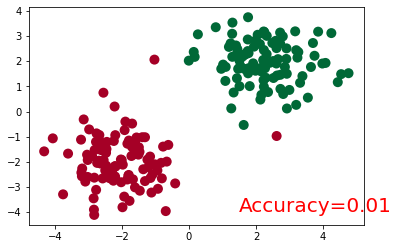

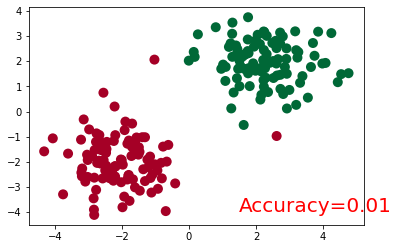

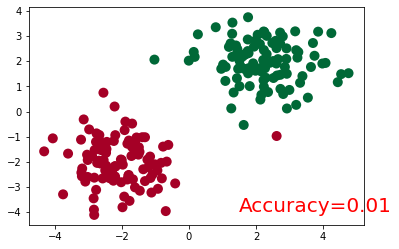

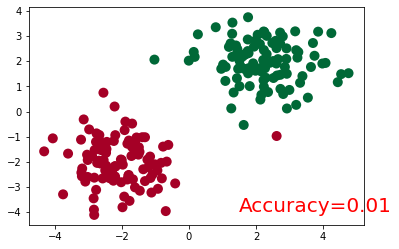

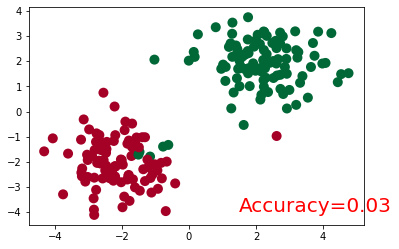

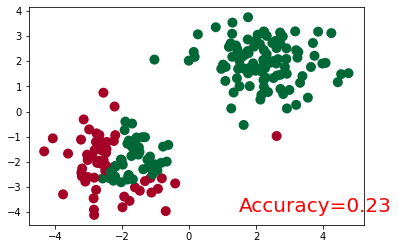

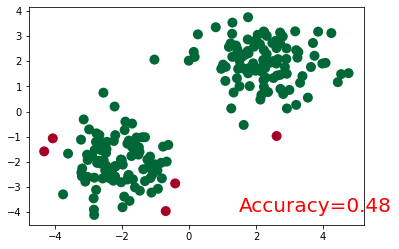

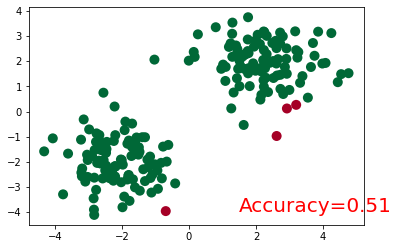

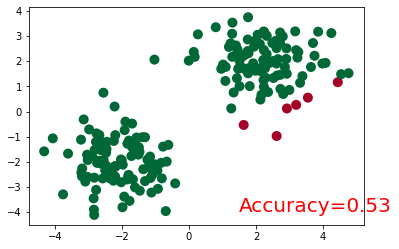

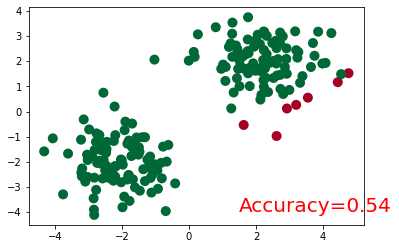

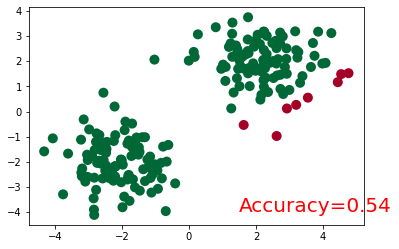

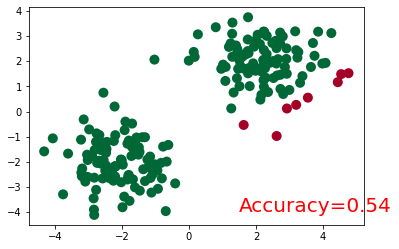

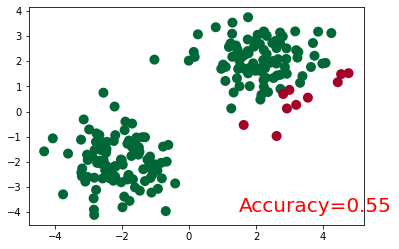

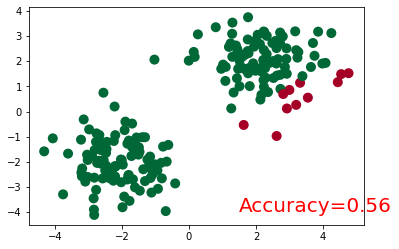

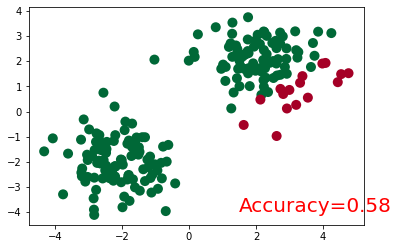

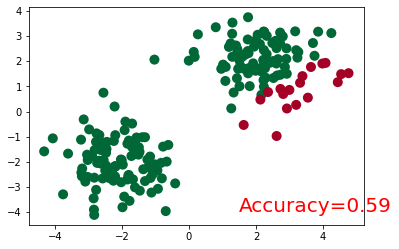

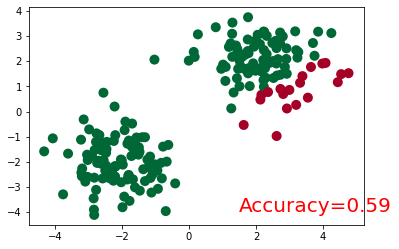

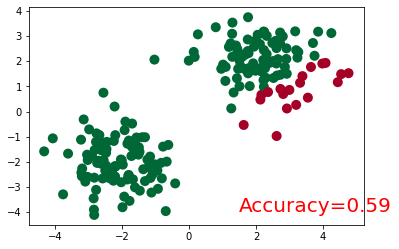

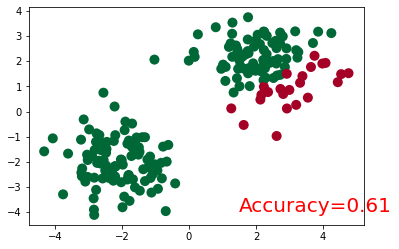

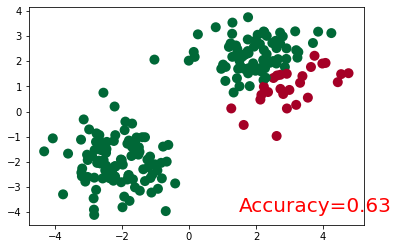

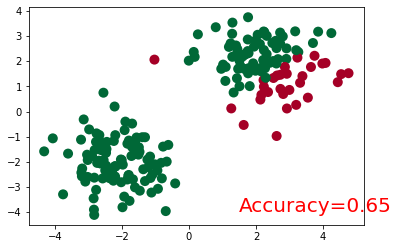

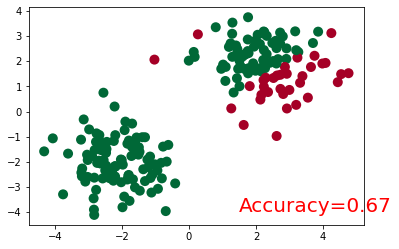

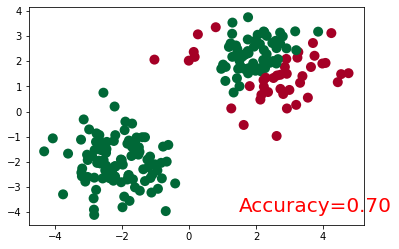

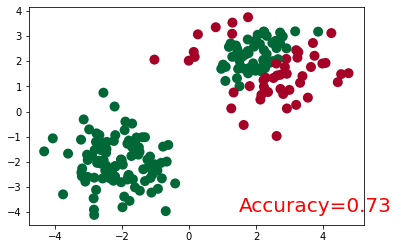

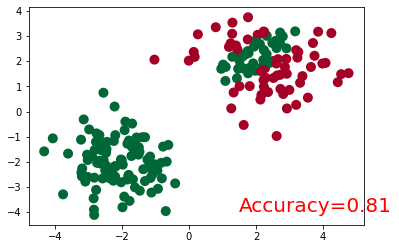

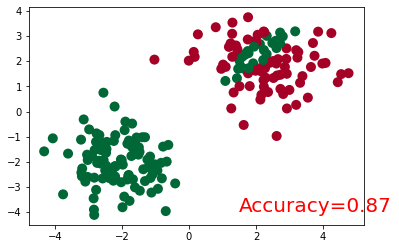

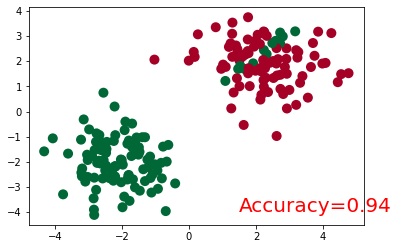

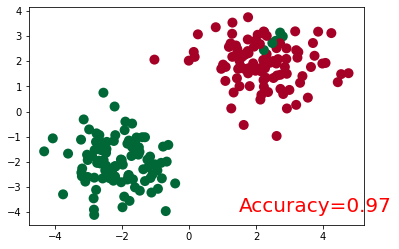

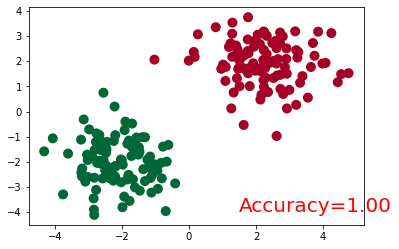

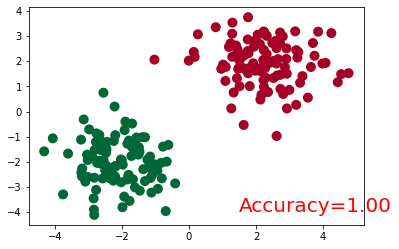

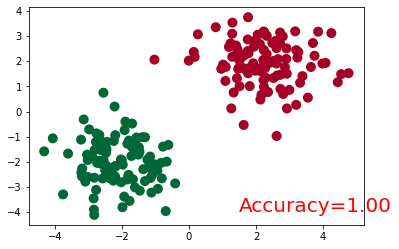

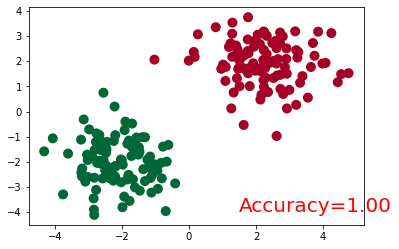

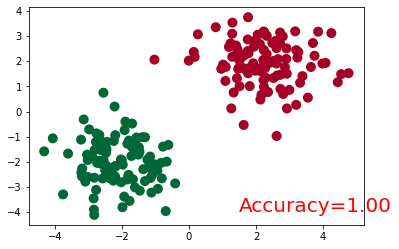

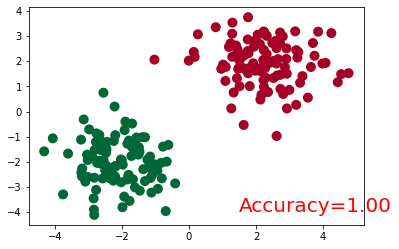

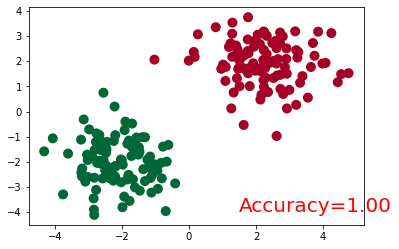

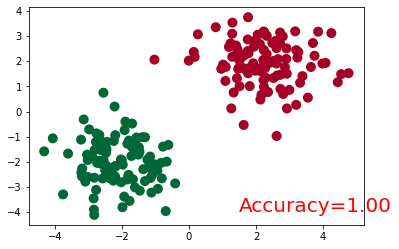

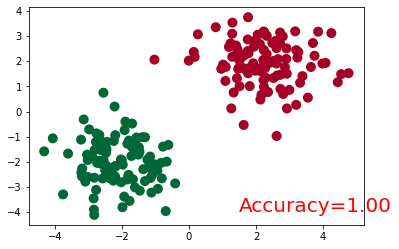

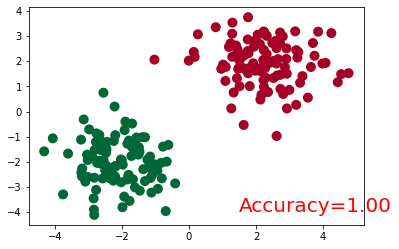

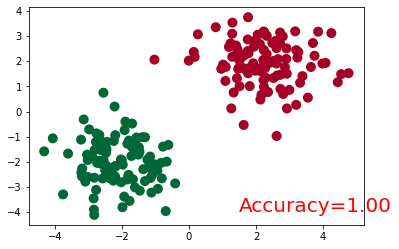

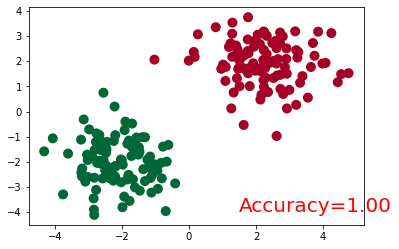

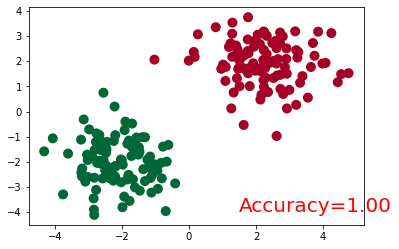

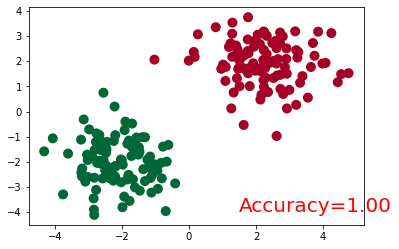

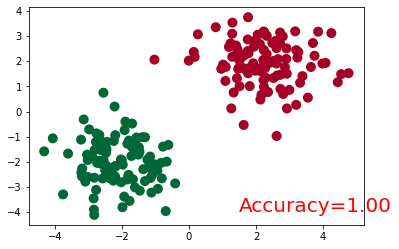

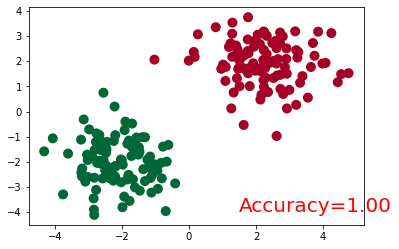

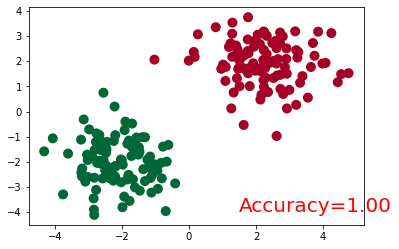

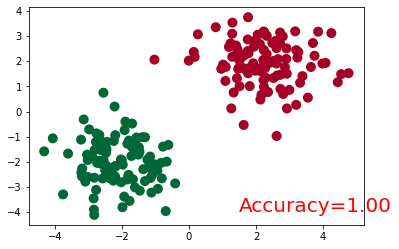

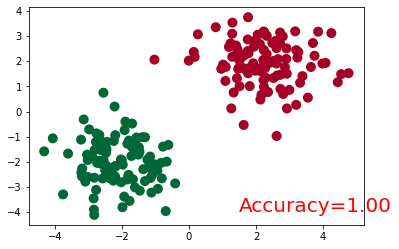

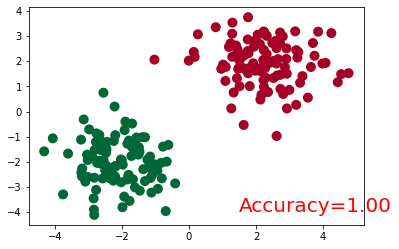

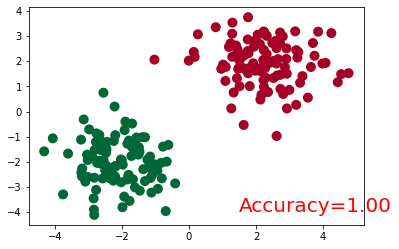

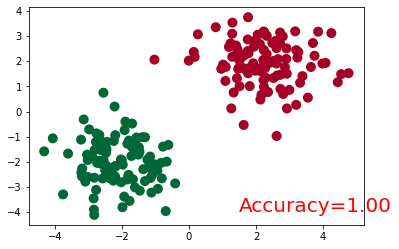

In [13]:
for t in range(100):
    out = net(x)     # 喂给 net 训练数据 x, 输出分析值

    loss = loss_func(out, y)     # 计算两者的误差

    optimizer.zero_grad()   
    loss.backward()         
    optimizer.step()        

    # 可视化展示
    if t % 2 == 0:
        plt.cla()
        # 过了一道 softmax 的激励函数后的最大概率才是预测值
        prediction = torch.max(F.softmax(out), 1)[1]

        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y) / 200.  # 计算准确度
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

plt.ioff()  # 停止画图
plt.show()

In [3]:
import os  # 文件处理模块，用于处理文件和目录
import torch  # pytorch的深度学习框架
import pandas as pd  #人脸识别库
from skimage import io, transform  # skimage为数字图像处理包，io用于读取、保存和显示图片或视频，transform用于几何变换和其他变换
import numpy as np  # 用于矩阵运算
import matplotlib.pyplot as plt # matplotlib为一个2D绘图库，pyplot模块提供了类似于MATLAB的界面，特别是与IPython结合使用时
from torch.utils.data import Dataset, DataLoader # 该接口主要用来将自定义的数据读取接口的输出或者PyTorch已有的数据读取接口的输入按照batch size封装成Tensor
from torchvision import transforms, utils

In [4]:
df = pd.read_csv("data.csv")

In [10]:
data = df.iloc[:,:]

In [19]:
data_1 = df.iloc[:,1]

In [22]:
Data = np.array(data)

In [24]:
Data[0]

array([2.09762435, 2.48471664])

In [25]:
import torch

In [31]:
A = torch.from_numpy(Data).type(torch.LongTensor)

In [32]:
A[1]

tensor([1, 2])

In [ ]:
len(data)

199